In [3]:
import pandas as pd
import numpy as np

In [4]:
df= pd.read_csv('Netflix Dataset.csv')

In [ ]:


df['Release_Date_parsed'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date_parsed'].dt.year



df['Primary_Genre'] = df['Type'].fillna('').apply(lambda x: x.split(',')[0].strip())

# Normalize Category values
df['Category_norm'] = df['Category'].str.strip()

# Parse Duration: minutes for Movies, seasons for TV Shows
def parse_duration(row):
    d = str(row['Duration']) if pd.notnull(row['Duration']) else ''
    if isinstance(d, str) and 'min' in d:
        try:
            return int(d.split(' ')[0])
        except Exception:
            return np.nan
    if isinstance(d, str) and 'Season' in d:
        try:
            return int(d.split(' ')[0])
        except Exception:
            return np.nan
    return np.nan

df['Duration_value'] = df.apply(parse_duration, axis=1)

# Tag duration unit
df['Duration_unit'] = np.where(df['Category_norm'].str.lower() == 'movie', 'min', np.where(df['Category_norm'].str.lower() == 'tv show', 'seasons', 'unknown'))

# Country: take first listed country as primary country
df['Primary_Country'] = df['Country'].fillna('').apply(lambda x: x.split(',')[0].strip())

# Quick preview
print(df[['Show_Id','Category_norm','Title','Year','Primary_Genre','Duration_value','Duration_unit','Primary_Country']].head())
print(df[['Year']].describe(include='all'))
print('Engineered Year, Primary_Genre, Duration_value/unit, Primary_Country')

  Show_Id Category_norm  Title    Year           Primary_Genre  \
0      s1       TV Show     3%  2020.0  International TV Shows   
1      s2         Movie   7:19  2016.0                  Dramas   
2      s3         Movie  23:59  2018.0           Horror Movies   
3      s4         Movie      9  2017.0      Action & Adventure   
4      s5         Movie     21  2020.0                  Dramas   

   Duration_value Duration_unit Primary_Country  
0               4       seasons          Brazil  
1              93           min          Mexico  
2              78           min       Singapore  
3              80           min   United States  
4             123           min   United States  
              Year
count  7779.000000
mean   2018.493637
std       1.388082
min    2008.000000
25%    2018.000000
50%    2019.000000
75%    2020.000000
max    2021.000000
Engineered Year, Primary_Genre, Duration_value/unit, Primary_Country


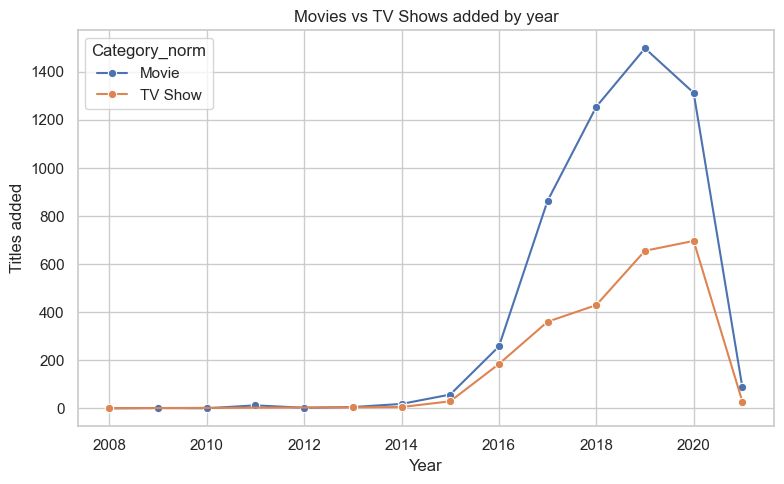

Plotted Movies vs TV Shows over years
Primary_Genre
Dramas                      1385
Comedies                    1075
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
Name: count, dtype: int64


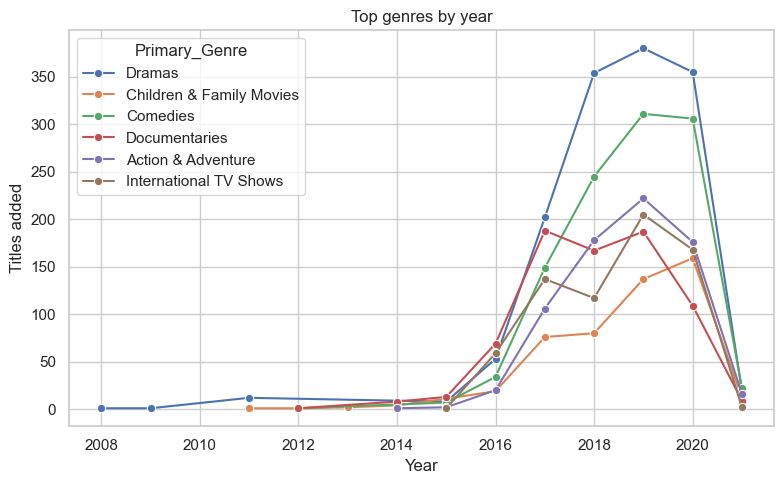

Plotted top genre trends and printed top 10 genres
Primary_Country
United States     2884
India              956
United Kingdom     577
Canada             259
Japan              237
France             196
South Korea        194
Spain              168
Mexico             123
Australia          108
Turkey             106
Egypt              105
Name: count, dtype: int64


/var/folders/rl/bt44s3lj5gd5q_txp80zrvb00000gn/T/ipykernel_1497/2897351145.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, orient='h', palette='Blues_r')


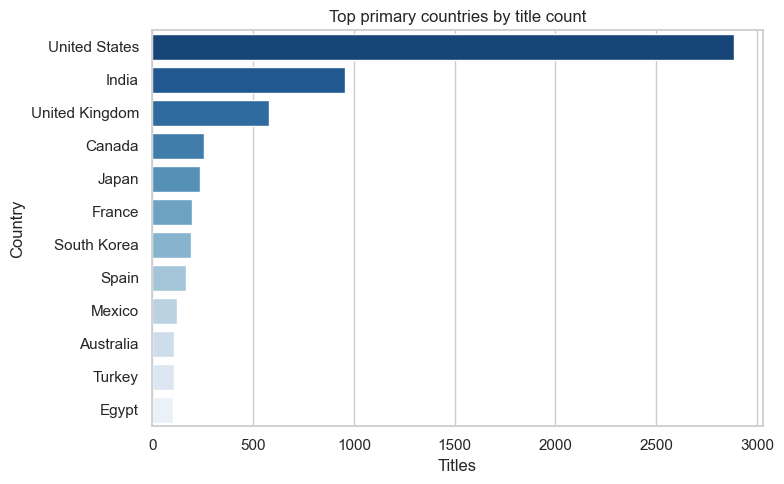

Plotted top country contributions and printed counts


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

# Movies vs TV Shows over the years
counts_year_cat = df.dropna(subset=['Year']).groupby(['Year','Category_norm']).size().reset_index(name='Count')
plt.figure(figsize=(8,5))
sns.lineplot(data=counts_year_cat, x='Year', y='Count', hue='Category_norm', marker='o')
plt.title('Movies vs TV Shows added by year')
plt.ylabel('Titles added')
plt.xlabel('Year')
plt.tight_layout()
plt.show()
print('Plotted Movies vs TV Shows over years')

# Top genres overall and trend for top 6
genre_counts = df['Primary_Genre'].value_counts().head(10)
print(genre_counts)

top_genres = df['Primary_Genre'].value_counts().head(6).index.tolist()
genre_year = df[df['Primary_Genre'].isin(top_genres) & df['Year'].notna()].groupby(['Year','Primary_Genre']).size().reset_index(name='Count')
plt.figure(figsize=(8,5))
sns.lineplot(data=genre_year, x='Year', y='Count', hue='Primary_Genre', marker='o')
plt.title('Top genres by year')
plt.ylabel('Titles added')
plt.xlabel('Year')
plt.tight_layout()
plt.show()
print('Plotted top genre trends and printed top 10 genres')

# Country contributions: top 12 primary countries
country_counts = df['Primary_Country'].replace('', pd.NA).dropna().value_counts().head(12)
print(country_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=country_counts.values, y=country_counts.index, orient='h', palette='Blues_r')
plt.title('Top primary countries by title count')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
print('Plotted top country contributions and printed counts')

Category_norm  Movie  TV Show
Year                         
2008.0           0.5      0.5
2009.0           1.0      0.0
2010.0           1.0      0.0
2011.0           1.0      0.0
2012.0           1.0      0.0


<Figure size 800x500 with 0 Axes>

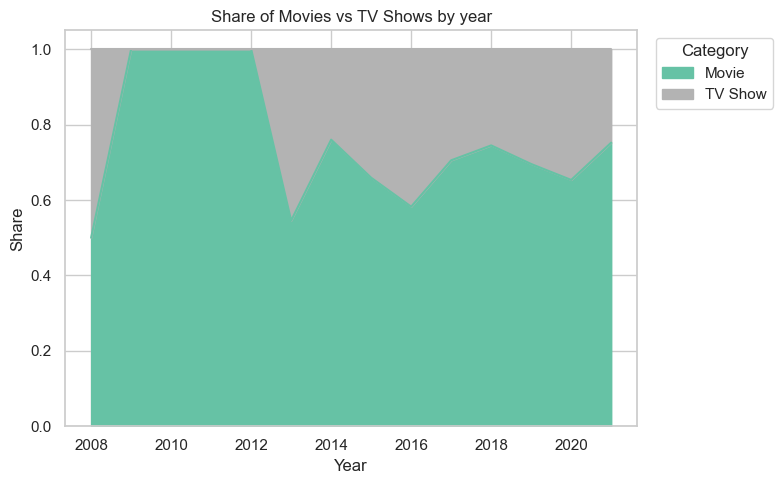

Plotted yearly share mix area chart
       Period             Primary_Genre  Count     Share
0   2016-2018        Action & Adventure    307  0.087764
4   2016-2018  Children & Family Movies    194  0.055460
7   2016-2018                  Comedies    436  0.124643
8   2016-2018            Crime TV Shows    153  0.043739
10  2016-2018             Documentaries    446  0.127501


/var/folders/rl/bt44s3lj5gd5q_txp80zrvb00000gn/T/ipykernel_1497/3726825633.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_genre = df.dropna(subset=['Period']).groupby(['Period','Primary_Genre']).size().reset_index(name='Count')
/var/folders/rl/bt44s3lj5gd5q_txp80zrvb00000gn/T/ipykernel_1497/3726825633.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_total = period_genre.groupby('Period')['Count'].transform('sum')


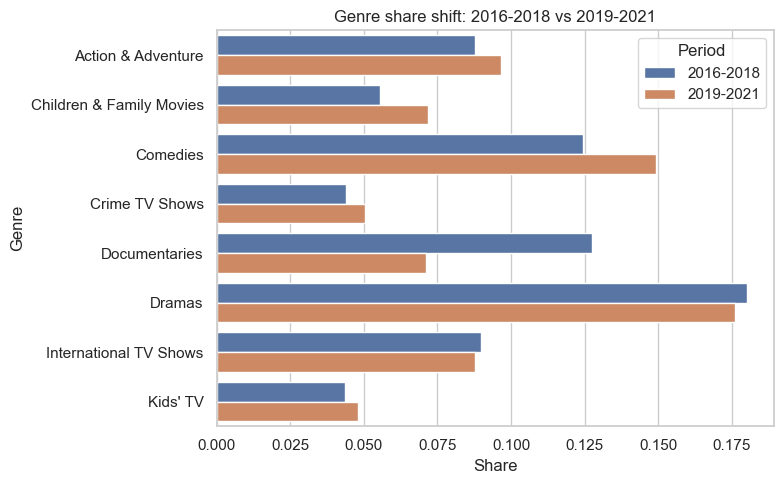

Plotted genre share shift across periods and printed head
Primary_Genre    Action & Adventure  Children & Family Movies  Comedies  \
Primary_Country                                                           
Canada                           16                        36        30   
France                           23                        10        25   
India                           127                        19       254   
Japan                            43                         0         0   
South Korea                      15                         3         4   

Primary_Genre    Crime TV Shows  Documentaries  Dramas  \
Primary_Country                                          
Canada                       13             32      33   
France                       15             20      48   
India                         9             19     382   
Japan                         4              2       8   
South Korea                  23              1      11   

Primary_G

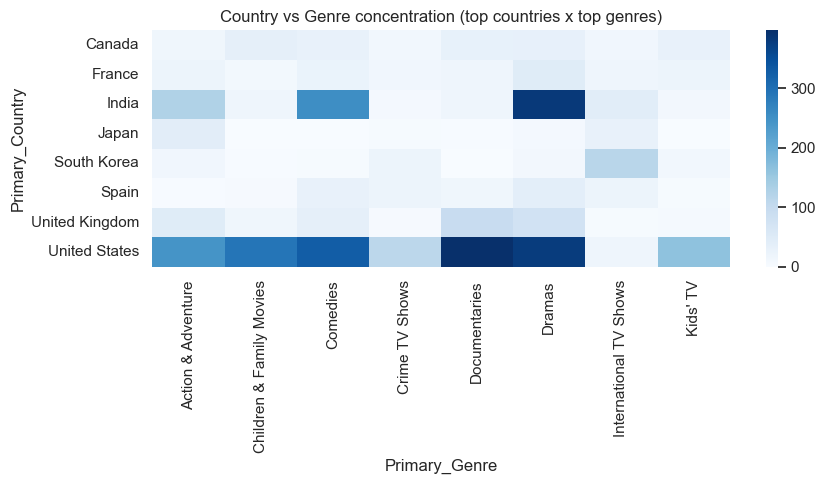

Plotted country-genre heatmap and printed head of matrix


In [7]:

import matplotlib.pyplot as plt

# Yearly share of Movies vs TV
year_cat = df.dropna(subset=['Year']).groupby(['Year','Category_norm']).size().reset_index(name='Count')
pivot_share = year_cat.pivot(index='Year', columns='Category_norm', values='Count').fillna(0)
pivot_share = pivot_share.div(pivot_share.sum(axis=1), axis=0)
print(pivot_share.head())

plt.figure(figsize=(8,5))
pivot_share.plot(kind='area', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Share of Movies vs TV Shows by year')
plt.ylabel('Share')
plt.xlabel('Year')
plt.legend(title='Category', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()
print('Plotted yearly share mix area chart')

# Genre shares by two periods: 2016-2018 vs 2019-2021
bins = pd.cut(df['Year'], bins=[2007,2018,2021], labels=['2016-2018','2019-2021'])
df['Period'] = bins
period_genre = df.dropna(subset=['Period']).groupby(['Period','Primary_Genre']).size().reset_index(name='Count')
period_total = period_genre.groupby('Period')['Count'].transform('sum')
period_genre['Share'] = period_genre['Count'] / period_total

# top 8 genres overall to keep chart readable
keep_genres = df['Primary_Genre'].value_counts().head(8).index.tolist()
period_genre_f = period_genre[period_genre['Primary_Genre'].isin(keep_genres)]
print(period_genre_f.head())

plt.figure(figsize=(8,5))
sns.barplot(data=period_genre_f, x='Share', y='Primary_Genre', hue='Period', orient='h')
plt.title('Genre share shift: 2016-2018 vs 2019-2021')
plt.xlabel('Share')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
print('Plotted genre share shift across periods and printed head')

# Country-genre matrix for top countries and top genres
top_countries = df['Primary_Country'].replace('', pd.NA).dropna().value_counts().head(8).index.tolist()
mat = df[df['Primary_Country'].isin(top_countries)]
mat = mat[mat['Primary_Genre'].isin(keep_genres)]
heat = mat.pivot_table(index='Primary_Country', columns='Primary_Genre', values='Show_Id', aggfunc='count', fill_value=0)
print(heat.head())

plt.figure(figsize=(9,5))
sns.heatmap(heat, annot=False, cmap='Blues')
plt.title('Country vs Genre concentration (top countries x top genres)')
plt.tight_layout()
plt.show()
print('Plotted country-genre heatmap and printed head of matrix')